## Задачи
1. Загрузите датасет transaction_data.csv. Проверьте размер таблицы,
типы переменных, число пропущенных значений и описательную статистику.

2. Какие значения находятся в колонке transaction? Сколько наблюдений относятся к тому или иному уровню?
Визуализируйте результат с помощью барплота. Подумайте, как можно улучшить график. Сколько транзакций завершились ошибкой?

3. Сколько успешных транзакций осуществил каждый из пользователей?
Постройте гистограмму распределения числа успешных транзакций, где
по оси x – число транзакций
по оси y – доля пользователей с таким числом транзакций
И выберите верные утверждения: 
   1) Пользователи в среднем совершили примерно по 66 транзакций
   2) Максимальное число транзакций – 82
   3) Пользователи в среднем совершили по 64 транзакции
   4) Примерно 25% пользователей совершили менее 61 транзакции
   5) Примерно 25% пользователей совершили более 61 транзакции
   6) Пользователи в среднем совершили примерно по 56 транзакций
   7) Максимальное число транзакций – 112
   8) Пользователи в среднем совершили примерно по 94 транзакции

1. Коллега прислал Вам обновленные данные. Постройте сводную таблицу user_vs_minute_pivot,
где в качестве столбцов будут использованы имена пользователей, строк – минуты,
значений – число совершенных операций в указанную минуту. Пропущенные значения заполните нулями.

5. Постройте график по сводной таблице из предыдущего шага, где 
  по оси x – минута транзакции (сколько минут прошло с начала дня)
  по оси y – число транзакций
Изучите представленный график, есть ли в данных ошибка, или же всё хорошо.

6. Если в данные закралась ошибка, исправьте её и сохраните правильное число минут,
прошедших с начала дня, в колонку true_minute.

In [2]:
#Загрузим библиотеки

import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
# Загрузим данные и посмотрим на них

path = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-m.kalachinova-16/shared/homeworks/python_ds_miniprojects/5/transaction_data.csv'

In [140]:
transactions = pd.read_csv(path, sep=',')

In [141]:
transactions.head()

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled


In [150]:
# Узнаем размер таблицы 'transactions'

transactions.shape

(5315, 3)

In [151]:
# Удалим дубликаты и снова посмотрим размер таблицы 'transactions'

transactions.drop_duplicates().shape

(5315, 3)

In [152]:
# Посмотрим на типы данных

transactions.dtypes

date           object
name           object
transaction    object
dtype: object

In [153]:
# Проверим данные на наличие пустых значений

transactions.isna().sum()

date           0
name           0
transaction    0
dtype: int64

In [154]:
# И посмотрим на описательную статистику 

transactions.describe()

,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:33:10,Masha_Ozerova,successfull
freq,6,112,3692


In [155]:
# Узнаем какие значения находятся в колонке transaction и сколько наблюдений относятся к тому или иному уровню.

transactions.transaction.value_counts()

successfull    3692
cancelled      1619
error             4
Name: transaction, dtype: int64

In [156]:
# Прежде, чем визуализировать данные, посчитаем количесвто транзакций по сгруппированным даннным и отсортируем их по убыванию,
# а также сохраним все в новую переменную dfplot.
dfplot = transactions.groupby('transaction', as_index=False) \
    .agg({'name': 'count'}) \
    .sort_values('name', ascending=False)

In [157]:
#С колько транзакций завершились ошибкой?

dfplot

# Ответ: 4

,transaction,name
2,successfull,3692
0,cancelled,1619
1,error,4


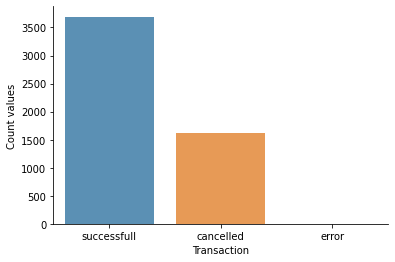

In [158]:
# Построим график с помощью барплота

ax = sns.barplot(x='transaction', y='name', data=dfplot, alpha=0.8)
ax.set(xlabel='Transaction', ylabel='Count values')
sns.despine()  # убрать часть рамки графика
plt.show()

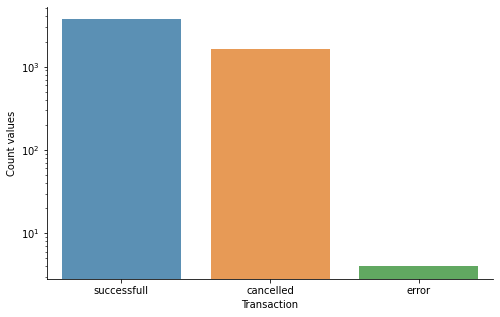

In [159]:
# Как можно улучшить график?
# Так как некоторые данные не совсем удобно считывать, можно перевести ось y в логарифмическую шкалу.
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='transaction', y='name', data=dfplot, alpha=0.8)
ax.set(xlabel='Transaction', ylabel='Count values')
plt.yscale('log')
sns.despine()

In [160]:
# Далее от нас требуется узнать, сколько успешных транзакций осуществил каждый из пользователей?
# А также постройте гистограмму распределения числа успешных транзакций.

In [161]:
transactions.head()

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled


In [162]:
# Для начала, отфильтруем данные по успешным транзакциям, сгрупируем по колонке 'name' и посчитаем их количество.
# Сохраним все в переменную 'users'

users = transactions.query('transaction == "successfull"') \
    .groupby('name', as_index=False) \
    .agg({'date': 'count'}) \
    .sort_values('date', ascending=False)

In [163]:
users.head()

,name,date
48,Svetlana_Smirnova,82
41,Olga_Smirnova,80
31,Masha_Ozerova,80
43,Svetlana_Ivanova,79
47,Svetlana_Polyanova,78


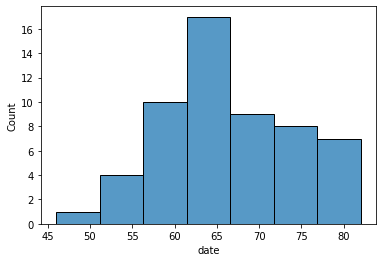

In [164]:
# С помощью хистплота посмотрим на распределение числа успешных транзакций

sns.histplot(users.date, kde=False)

In [165]:
# Выберем верные утверждения по заданию:
#   1. Пользователи в среднем совершили примерно по 66 транзакций
#   2. Максимальное число транзакций – 82
#   3. Пользователи в среднем совершили по 64 транзакции
#   4. Примерно 25% пользователей совершили менее 61 транзакции
#   5. Примерно 25% пользователей совершили более 61 транзакции
#   6. Пользователи в среднем совершили примерно по 56 транзакций
#   7. Максимальное число транзакций – 112
#   8. Пользователи в среднем совершили примерно по 94 транзакции

users.describe()

# Ответ: 1, 2, 4

,date
count,56.000000
mean,65.928571
std,7.787769
min,46.000000
25%,61.000000
50%,64.000000
75%,72.000000
max,82.000000


In [166]:
# Коллега прислал Вам обновленные данные. Постройте сводную таблицу user_vs_minute_pivot,
# где в качестве столбцов будут использованы имена пользователей, строк – минуты,
# значений – число совершенных операций в указанную минуту. Пропущенные значения заполните нулями.

In [167]:
#Загрузим обновленные данные и сохраним их в переменную 'transactions_updated'

transactions_updated = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-m.kalachinova-16/Chemidov/csv_files/transaction_data_updated.csv', sep=',')
transactions_updated.head()

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


In [168]:
# Построим сводную таблицу

user_vs_minute_pivot  = transactions_updated \
    .groupby(['name', 'minute'], as_index=False) \
    .agg({'date': 'count'}) \
    .pivot(index='minute', columns='name', values='date')

user_vs_minute_pivot.fillna(0, inplace=True) # Заполним пустые значение нолями

In [169]:
user_vs_minute_pivot.head()

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0


In [170]:
# Альтернативный вариант решения (с помощью метода pivot_table)

user_vs_minute_pivot2 = transactions_updated.pivot_table(index='minute',
                                                        columns='name',
                                                        values='transaction',
                                                        aggfunc='count')
user_vs_minute_pivot2.fillna(0, inplace=True)

In [171]:
user_vs_minute_pivot2.head()

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0


In [172]:
# Сравним два датафрейма

user_vs_minute_pivot.equals(user_vs_minute_pivot2)

True

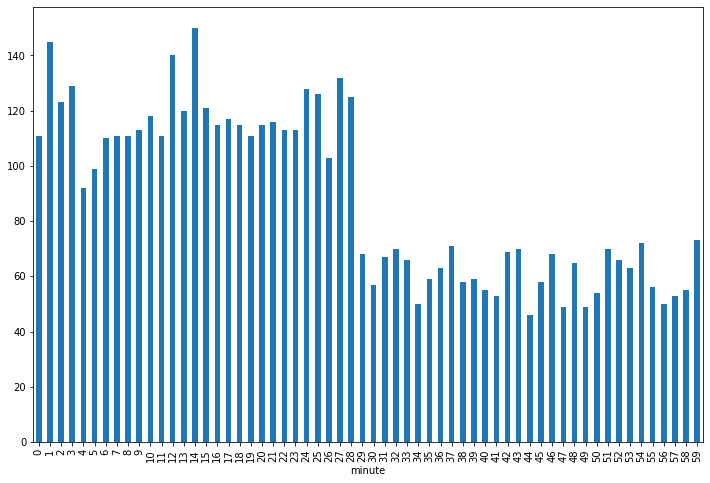

In [173]:
# Построим график по сводной таблице

user_vs_minute_pivot.sum(axis=1).plot.bar(figsize=(12,8))

In [174]:
# Можно заметить, что в первой (левой) половине сгруппировано примерно вдвое больше данных (транзакций), 
# что является, либо особенностью (закономерностью) в наших данных, либо данные сгруппированы некорректно.

# Если посмотреть на исходные данные 
transactions_updated.head()
# можно заметить, что в колонке 'minute' (минутная часть) не учитываются прошедшые часы, как минуты (60 мин), т.е ...

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


In [175]:
# Если посмотрим на минимальное значение в колонке дата
transactions_updated.date.min()

'2020-03-02 00:00:00'

In [176]:
# И на максимальное значение в колонке дата
transactions_updated.date.max()

# То увидим, что все наши данные находятся в диапазоне от 0 до 89 (01.29 = 60 + 29 минут)
# и все транзацкии после 60 минут (т.е за след 29 минут) попали дважды в один и тот же промежуток.

'2020-03-02 01:29:05'

In [177]:
# Необходимо исправить ошибку в данных и сохранить правильное число минут,
# прошедших с начала дня, в колонку true_minute.

In [180]:
# В исходном датафрейме колонка 'date' имеет строчный тип
transactions_updated.dtypes

date           object
name           object
transaction    object
minute          int64
dtype: object

In [183]:
# Чтобы решить задачу, нам нужно преобразовать колонку 'date' в формат даты

transactions_updated['date'] = pd.to_datetime(df_update.date)

In [184]:
# Теперь, преобразуем все значения в минуты (склеим минуты с часами, умноженными на 60)

transactions_updated['true_minute'] = transactions_updated.date.dt.minute + transactions_updated.date.dt.hour * 60

In [187]:
transactions_updated.true_minute.max()

89

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


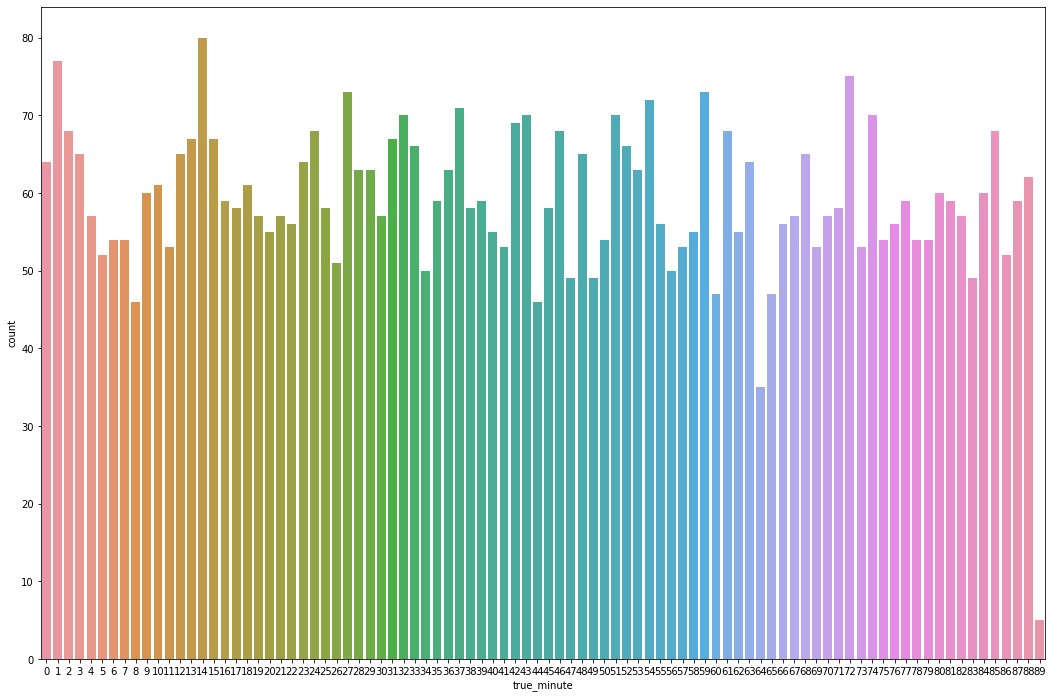

In [197]:
# И наконец, построим верный график, с помощью countplot

plt.figure(figsize=(18, 12))
sns.countplot(transactions_updated.true_minute)